In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:37
🔁 Restarting kernel...


In [1]:
%autosave 60
!mamba install -c conda-forge rdkit

Streaming output truncated to the last 5000 lines.
jbig                     [] (00m:05s) Waiting...
libgfortran-ng           [] (00m:05s) Waiting...
lcms2                    [] (00m:05s) Waiting...
libbrotlidec             [] (00m:05s) Waiting...
libnsl                   [] (00m:05s) Waiting...
libuuid                  [] (00m:05s) Waiting...
pcre                     [] (00m:05s) Waiting...
libxcb                   [] (00m:05s) Waiting...
numpy                    [] (00m:05s) Waiting...
pycairo                  [] (00m:05s) Waiting...
rdkit                    [] (00m:05s)     29 MB /     39 MB (  3.90 MB/s)
typing_extensions        [] (00m:05s) Waiting...
xorg-libsm               [] (00m:04s) Waiting...
xorg-libxext             [] (00m:04s) Waiting...
xorg-xproto              [] (00m:04s) Waiting...
cryptography             [] (00m:04s) Waiting...
libstdcxx-ng             [] (00m:04s) Waiting...
cycler                   [] (00m:04s) Waiting...
greenlet                 [] (00m:04s) Wait

In [2]:
#Installing a package
!pip install git+https://github.com/samoturk/mol2vec

  Cloning https://github.com/samoturk/mol2vec to /tmp/pip-req-build-fgov1gcm
  Running command git clone -q https://github.com/samoturk/mol2vec /tmp/pip-req-build-fgov1gcm
     |████████████████████████████████| 24.1 MB 3.3 kB/s 
     |████████████████████████████████| 306 kB 46.3 MB/s 
     |████████████████████████████████| 793 kB 41.1 MB/s 
     |████████████████████████████████| 292 kB 42.3 MB/s 
     |████████████████████████████████| 58 kB 5.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
     |████████████████████████████████| 380 kB 49.1 MB/s 
     |████████████████████████████████| 1.1 MB 35.9 MB/s 
     |████████████████████████████████| 1.6 MB 44.4 MB/s 
     |████████████████████████████████| 102 kB 9.5 MB/s 
     |████████████████████████████████| 59 kB 5.5 MB/s 
     |████████████████████████████████| 100 kB 9.2 MB/s 
  Created wheel for mol2vec: filename=mol2vec-0.1-py3-none-any.whl size=14025 sha256=a63fed199e58c95fda3f3b2411c30fad6900edcce5565bd7701d5

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
from rdkit import Chem
import gensim
import numpy as np

#Method transforms smiles strings to mol rdkit object
df_new = pd.read_csv('/content/drive/MyDrive/mol2vec-master/mol2vec-master/examples/data/BBBP.csv', index_col=0)
df_new['mol'] = df_new['smiles'].apply(lambda x: Chem.MolFromSmiles(x))
df_new = df_new.dropna(subset=['mol'])

In [7]:
df_new

,name,p_np,smiles,mol
num,,,,
1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,<rdkit.Chem.rdchem.Mol object at 0x7f6033826b70>
2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,<rdkit.Chem.rdchem.Mol object at 0x7f6033826c60>
3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,<rdkit.Chem.rdchem.Mol object at 0x7f6033826c10>
4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x7f6033826b20>
5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,<rdkit.Chem.rdchem.Mol object at 0x7f6033826cb0>
...,...,...,...,...
2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,<rdkit.Chem.rdchem.Mol object at 0x7f60428cf3a0>
2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,<rdkit.Chem.rdchem.Mol object at 0x7f60428cf350>
2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,<rdkit.Chem.rdchem.Mol object at 0x7f60428cf300>


In [8]:
model = gensim.models.Word2Vec.load('/content/drive/MyDrive/mol2vec-master/mol2vec-master/examples/models/model_300dim.pkl')

In [9]:
len(model.wv.key_to_index)

21003

In [10]:
vector = model.wv.vectors.tolist()
words = list(model.wv.index_to_key)
# get all word from the model with each vector
model_df = pd.DataFrame({'id': words, 'embedding': vector})

In [11]:
model_df

,id,embedding
0,3218693969,"[0.006540206726640463, -0.05388107895851135, -..."
1,3217380708,"[0.16308599710464478, 0.00655911210924387, -0...."
2,951226070,"[0.012080743908882141, -0.07496873289346695, -..."
3,2968968094,"[0.07662508636713028, -0.16706736385822296, -0..."
4,2246728737,"[-0.13674528896808624, 0.06729240715503693, -0..."
...,...,...
20998,3232784661,"[0.09510962665081024, 0.0025732729118317366, -..."
20999,828779412,"[0.10063909739255905, -0.016129184514284134, -..."
21000,1299519034,"[0.10718672722578049, -0.04157715290784836, -0..."
21001,323005392,"[0.08217160403728485, -0.024722030386328697, -..."


In [ ]:
# d = []
# for i in model_df.embedding:
#   d.append(i)
# new_df = pd.DataFrame(d)
# #get the data for clustering
# new_df.to_csv("new_df.tsv", sep="\t" )

## Visualize for each chemicals

In [12]:
from mol2vec.features import mol2alt_sentence, MolSentence, DfVec, sentences2vec
from mol2vec.helpers import depict_identifier, plot_2D_vectors, IdentifierTable, mol_to_svg
from rdkit.Chem import Draw

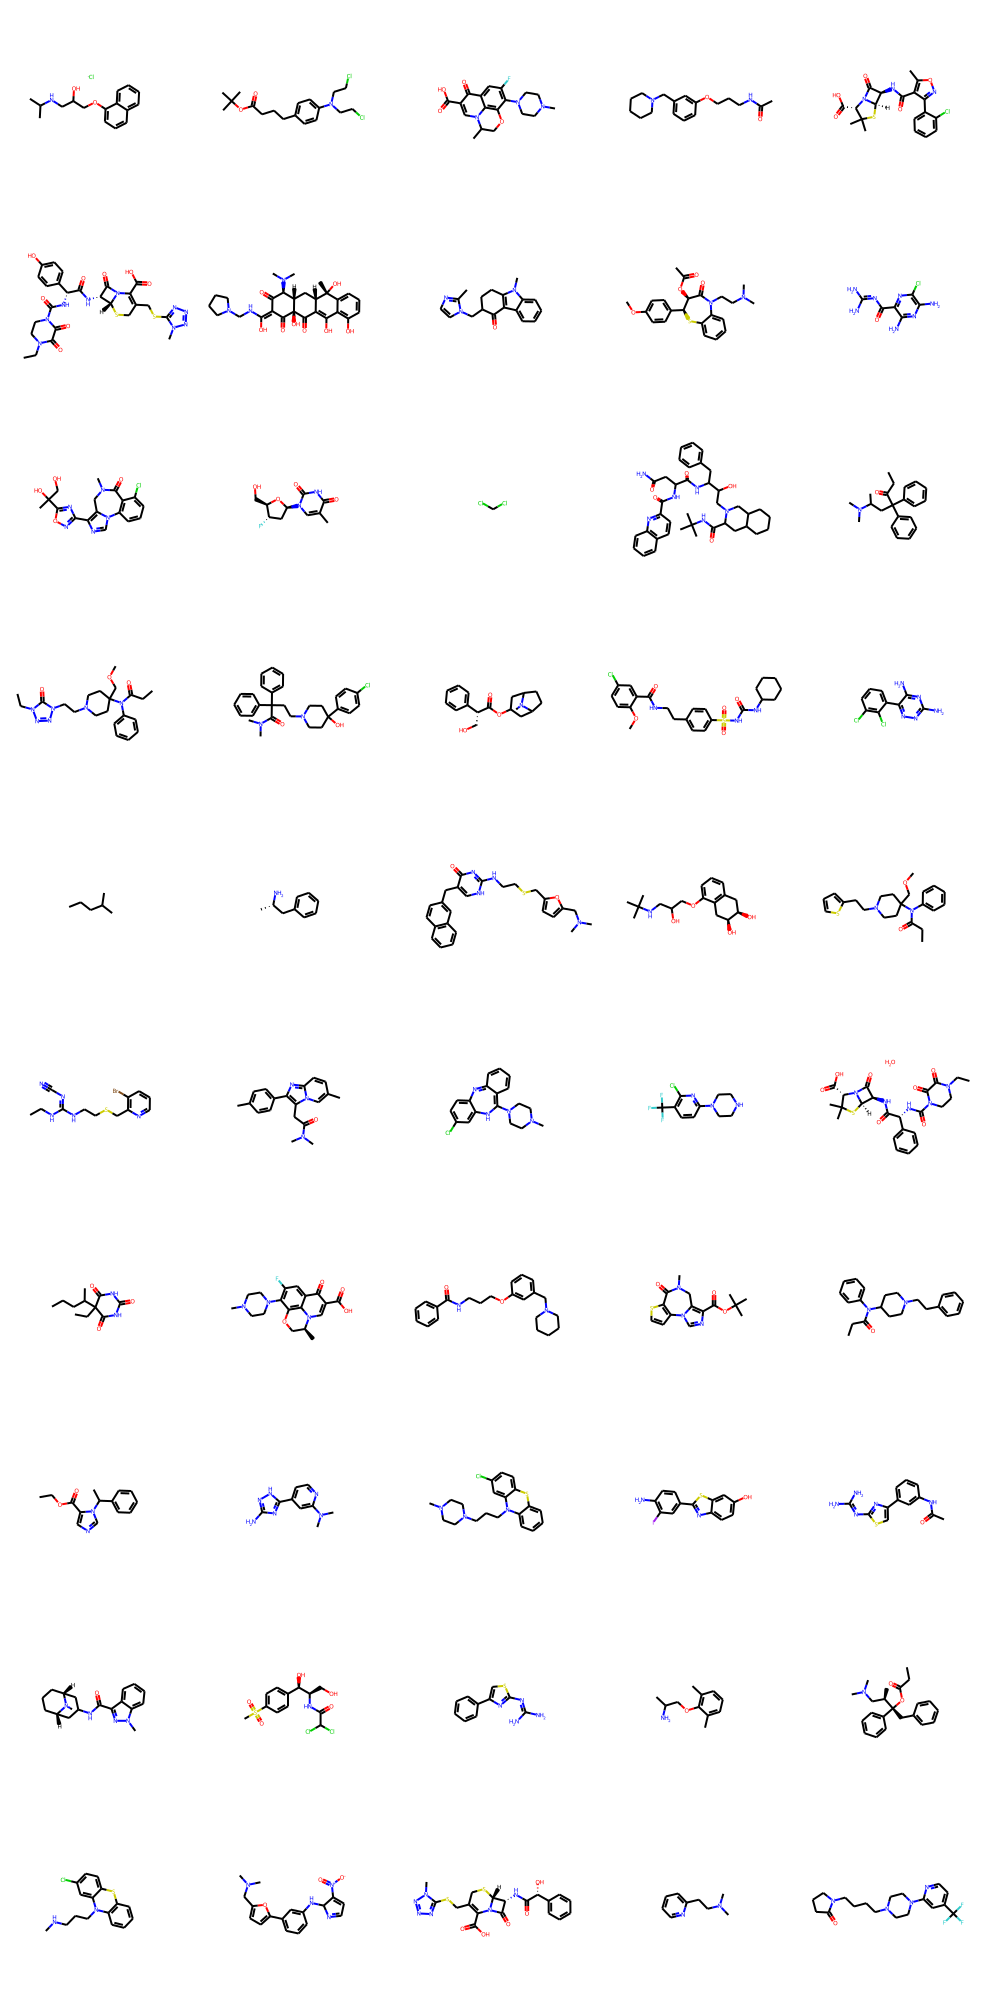

In [13]:
aas = [Chem.MolFromSmiles(x) for x in df_new['smiles']]
Draw.MolsToGridImage(aas[:50], molsPerRow=5, useSVG=False)

In [14]:
aa_sentences = [mol2alt_sentence(x, 1) for x in aas]
flat_list = [item for sublist in aa_sentences for item in sublist]
aa_identifiers_unique = set(flat_list)

In [15]:
df_new['sentence'] = df_new.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)

In [16]:
df_new

,name,p_np,smiles,mol,sentence
num,,,,,
1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,"<img data-content=""rdkit/molecule"" src=""data:i...","(3855290507, 2246728737, 3537119515, 224527360..."
2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,"<img data-content=""rdkit/molecule"" src=""data:i...","(2246699815, 4194366826, 864942730, 1510328189..."
3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,"<img data-content=""rdkit/molecule"" src=""data:i...","(3217380708, 3796970912, 3217380708, 369315086..."
4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,"<img data-content=""rdkit/molecule"" src=""data:i...","(2968968094, 2142032900, 2968968094, 214203290..."
5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,"<img data-content=""rdkit/molecule"" src=""data:i...","(2246728737, 422715066, 3217380708, 3662562115..."
...,...,...,...,...,...
2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,"<img data-content=""rdkit/molecule"" src=""data:i...","(3218693969, 994485099, 3217380708, 2424973678..."
2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,"<img data-content=""rdkit/molecule"" src=""data:i...","(2976033787, 3109000344, 2092489639, 934550081..."
2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,"<img data-content=""rdkit/molecule"" src=""data:i...","(3189554341, 3772526016, 2041434490, 247958282..."


## Mapping each words with each vectors

In [29]:
def get_mean_vector(sentence,model_df):

  mol_embedings = []
  mol_all = []
  words = list(sentence)
  
  if len(words)>=1:

    for i in words:
      vector = model_df.loc[model_df.id == i]['embedding'].squeeze()
      mol_embedings.append(np.array(vector))
    try:  
      avg = (np.nanmean(np.array(mol_embedings),axis=0))
      return avg
    except:
      pass

In [33]:
df_new["molecule_vectors"] = df_new["sentence"].map(lambda x: get_mean_vector(x, model_df))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


In [34]:
df_new

,name,p_np,smiles,mol,sentence,molecule_vectors
num,,,,,,
1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,"<img data-content=""rdkit/molecule"" src=""data:i...","(3855290507, 2246728737, 3537119515, 224527360...",None
2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,"<img data-content=""rdkit/molecule"" src=""data:i...","(2246699815, 4194366826, 864942730, 1510328189...","[0.008019352858157261, -0.04276425176826508, -..."
3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,"<img data-content=""rdkit/molecule"" src=""data:i...","(3217380708, 3796970912, 3217380708, 369315086...","[0.10124825892181924, -0.09904542970112883, -0..."
4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,"<img data-content=""rdkit/molecule"" src=""data:i...","(2968968094, 2142032900, 2968968094, 214203290...","[0.013475926759253656, -0.11175630044280774, -..."
5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,"<img data-content=""rdkit/molecule"" src=""data:i...","(2246728737, 422715066, 3217380708, 3662562115...","[0.009368877135345647, -0.09082202969825473, -..."
...,...,...,...,...,...,...
2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,"<img data-content=""rdkit/molecule"" src=""data:i...","(3218693969, 994485099, 3217380708, 2424973678...","[0.08208933061755755, -0.04740600841229453, -0..."
2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...,"<img data-content=""rdkit/molecule"" src=""data:i...","(2976033787, 3109000344, 2092489639, 934550081...","[0.07833349058206228, -0.10648184696738436, -0..."
2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...,"<img data-content=""rdkit/molecule"" src=""data:i...","(3189554341, 3772526016, 2041434490, 247958282...",None


In [35]:
df_end = df_new.dropna(subset=['molecule_vectors'])
df_end

,name,p_np,smiles,mol,sentence,molecule_vectors
num,,,,,,
2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,"<img data-content=""rdkit/molecule"" src=""data:i...","(2246699815, 4194366826, 864942730, 1510328189...","[0.008019352858157261, -0.04276425176826508, -..."
3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,"<img data-content=""rdkit/molecule"" src=""data:i...","(3217380708, 3796970912, 3217380708, 369315086...","[0.10124825892181924, -0.09904542970112883, -0..."
4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,"<img data-content=""rdkit/molecule"" src=""data:i...","(2968968094, 2142032900, 2968968094, 214203290...","[0.013475926759253656, -0.11175630044280774, -..."
5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,"<img data-content=""rdkit/molecule"" src=""data:i...","(2246728737, 422715066, 3217380708, 3662562115...","[0.009368877135345647, -0.09082202969825473, -..."
6,cefoperazone,1,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@H]2[C@H]3SCC(=C(...,"<img data-content=""rdkit/molecule"" src=""data:i...","(2246728737, 3542456614, 2245384272, 225184566...","[0.042615161115959796, -0.06709064657016742, -..."
...,...,...,...,...,...,...
2046,zomebazam,1,C3=C(N2C1=C([N](C)N=C1C)N(C(=O)CC2=O)C)C=CC=C3,"<img data-content=""rdkit/molecule"" src=""data:i...","(3218693969, 951226070, 3217380708, 2473389857...","[0.0629135674375686, -0.10027489375456103, -0...."
2047,zometapine,1,C3=C(C1=NCCN=C2N(NC(=C12)C)C)C=CC=C3Cl,"<img data-content=""rdkit/molecule"" src=""data:i...","(3218693969, 994485099, 3217380708, 2353112200...","[0.06067084543112861, -0.042270885927504616, -..."
2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl,"<img data-content=""rdkit/molecule"" src=""data:i...","(3218693969, 994485099, 3217380708, 2424973678...","[0.08208933061755755, -0.04740600841229453, -0..."


## Make the vector to new data frame

In [36]:
list_vec = []
for i in df_end.molecule_vectors:
  list_vec.append(i)

In [40]:
df_vec = pd.DataFrame(list_vec)
df_vec.to_csv("vec.tsv", sep="\t" )

In [48]:
df_end[['name','p_np']].to_csv("name.tsv", sep="\t" )

In [44]:
%load_ext tensorboard
import os
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorboard.plugins import projector
